In [3]:
import pandas as pd
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

df=pd.read_csv('Data4ML.csv')
df=df[ (df['MemBW(GBps)'].notna() ) & (df['CPUFrequency'].notna() ) & (df['Cores'].notna() )  ]

In [4]:
import matplotlib.pyplot as plt
train_data = df.head(-1)
x=train_data[['CPUFrequency']]
y=train_data[['Performance']]
plt.plot(x,y)

Text(0,0.5,'WRF Performance (Lower is better)')

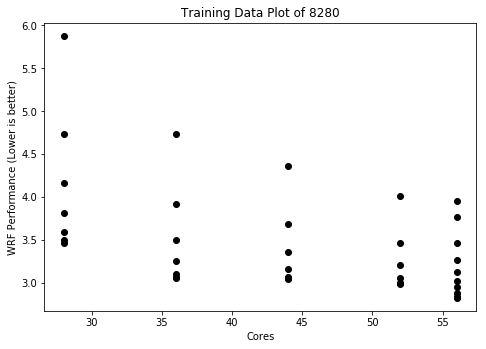

In [5]:
import matplotlib.pyplot as plt
x_train = train_data[['CPUFrequency']]
z_train = train_data[['Cores']]
y_train = train_data[['Performance']]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(z_train, y_train, 'o', color='black')
ax.set_title("Training Data Plot of 8280")
ax.set_xlabel("Cores")
ax.set_ylabel("WRF Performance (Lower is better)")

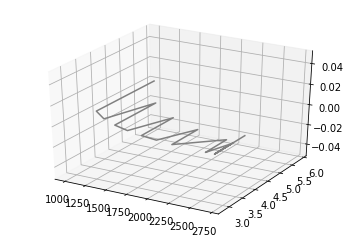

In [6]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(x_train, y_train, 'gray')

In [11]:
#df=df[ (df['L3Bound'].notna() )  ]
X=df[['CPUFrequency','Cores','Turbo','PeakMemBW','MemBW(GBps)','Frequency(MHz)']]
#X=df[['Frequency(MHz)','Cores']]
y=df[['Performance']]

#Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

#Multilayer Perceptron Regressor
mlp = MLPRegressor(random_state=0)
mlp.fit(X, y)

#Reidge Regression
##A technique used when the data suffers from multicollinearity (independent variables are highly correlated)
crf = linear_model.Ridge(alpha=1.0)
crf.fit(X, y)

#Lasso Regression
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

#Elastic Net Regression
Eregr = linear_model.ElasticNet(random_state=5)
Eregr.fit(X, y)
#print(regr.coef_)
#print(regr.intercept_)

#Principal Component Regression 

##As Increase in cores relates to a decrease in frequency, 
##so also attempting apprach where independent variables are highly correlated(Unsure about the strength of relation) 

#Partial Least Squares (PLS) Regression
##A technique of principal component regression when you have independent variables highly correlated.
##PLS takes the dependent variable into account therefore leads to models that can fit the dependent var with fewer components.
pls = PLSRegression(n_components=6)
pls.fit(X, y)

#Support Vector Regression
##It can solve both linear and non-linear models.
##Main idea of SVR is to minimize error, individualizing the hyperplane which maximizes the margin.
##Most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 
##We have a non-linear condition so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
svcr = SVR(kernel='rbf')
svcr.fit(X,y)

#Poisson Regression
##Used when dependent variable has count data. Since we have very less data this can fit well
poisson_glm = Pipeline([("regressor", PoissonRegressor(alpha=1e-12, max_iter=300))])
poisson_glm.fit(X, y)

c:\users\varun_bawa\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\varun_bawa\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\varun_bawa\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 5
  warnings.warn('X scores are null at iteration %s' % k)
c:\users\varun_bawa\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Pipeline(steps=[('regressor', PoissonRegressor(alpha=1e-12, max_iter=300))])

In [12]:
CPUFreq=2501
Freq=2601.9733
Turbo=3900
Cores=40
MemBw=164.8883
PeakMemBW=274.96
#L3=2.7
#X=df[['CPUFrequency','Cores','Turbo','PeakMemBW','MemBW(GBps)','Frequency(MHz)']]
Factors=[[CPUFreq,Cores,Turbo,PeakMemBW,MemBw,Freq]]
ob_val = 3.4 #Obtained_value
print("Prediction Model outputs\nOriginal Value = "+str(ob_val)+"\n")
print("Model Name\t\tPrediction Value\t\tPercentage Change(%)\n")
print("Linear Regression:\t\t","{:.4f}".format(float(regr.predict(Factors))),"\t\t\t","{:.2f}".format(((float(regr.predict(Factors))/ob_val)-1)*100))
print("MLP Regression:\t\t\t","{:.4f}".format(float(mlp.predict(Factors))),"\t\t\t","{:.2f}".format(((float(mlp.predict(Factors))/ob_val)-1)*100))
print("Ridge Regression:\t\t","{:.4f}".format(float(crf.predict(Factors))),"\t\t\t","{:.2f}".format(((float(crf.predict(Factors))/ob_val)-1)*100))
print("Lasso Regression:\t\t","{:.4f}".format(float(clf.predict(Factors))),"\t\t\t","{:.2f}".format(((float(clf.predict(Factors))/ob_val)-1)*100))
print("Elastic Net Regression:\t\t","{:.4f}".format(float(Eregr.predict(Factors))),"\t\t\t","{:.2f}".format(((float(Eregr.predict(Factors))/ob_val)-1)*100))
print("PLS Regression:\t\t\t","{:.4f}".format(float(pls.predict(Factors))),"\t\t\t","{:.2f}".format(((float(pls.predict(Factors))/ob_val)-1)*100))
print("Support Vector Regression:\t","{:.4f}".format(float(svcr.predict(Factors))),"\t\t\t","{:.2f}".format(((float(svcr.predict(Factors))/ob_val)-1)*100))
print("Poisson Regression:\t\t","{:.4f}".format(float(poisson_glm.predict(Factors))),"\t\t\t","{:.2f}".format(((float(poisson_glm.predict(Factors))/ob_val)-1)*100))

Prediction Model outputs
Original Value = 3.4

Model Name		Prediction Value		Percentage Change(%)

Linear Regression:		 3.5220 			 3.59
MLP Regression:			 -4.8795 			 -243.51
Ridge Regression:		 3.5220 			 3.59
Lasso Regression:		 3.5165 			 3.43
Elastic Net Regression:		 3.4940 			 2.76
PLS Regression:			 3.5220 			 3.59
Support Vector Regression:	 3.1024 			 -8.75
Poisson Regression:		 3.4565 			 1.66


In [12]:
# from scipy.signal import savgol_filter
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# pca = PCA()
# X_reduced = pca.fit_transform(scale(X))

# regr = linear_model.LinearRegression()
# regr.fit(Xreg, y)
# y_c = regr.predict([[Freq,Cores]])

In [ ]:
#L3 Cache
#Effective frequency & Turbo
#Memory Bandwidth